## 1. The Classification of Iris Dataset Using DecisionTreeClassifier 

In [1]:
# Iris dataset 
import numpy as np
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier # Decision Tree module 
from sklearn.model_selection import train_test_split # Split the train data and test data
from sklearn.metrics import accuracy_score  # Evaluate the accuracy

# Set the random seed
np.random.seed(42)

# Load the iris dataset
iris = datasets.load_iris()
print('The features of the iris dataset: ', iris.feature_names)
print('The target name of : the iris dataset', iris.target_names)

The features of the iris dataset:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The target name of : the iris dataset ['setosa' 'versicolor' 'virginica']


**The iris dataset has seperated the data and lables, just need to call the atrribute: `iris.data` and `iris.target`.**

**Create the X and y**

In [2]:
X = iris.data  
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**The labels depend on the target name in the index of ['setosa' 'versicolor' 'virginica']**

In [3]:
y = iris.target
print(y[:5])  
print(y[-50:])

[0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
# Split the train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the model
clf = DecisionTreeClassifier(criterion='entropy')

# Use the training data set to fit the model 
decision_tree_clf = clf.fit(X_train, y_train)

# Use the test data set to predict the labels
y_preds = decision_tree_clf.predict(X_test) 

# Score the model --> accuracy
score = accuracy_score(y_test, y_preds)
print('The accuracy of the decision tree model: ', score)
print('True labels:     ', y_test)
print('Predicted labels:', y_preds)

The accuracy of the decision tree model:  1.0
True labels:      [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Draw the tree structure to understand what happen behind the tree

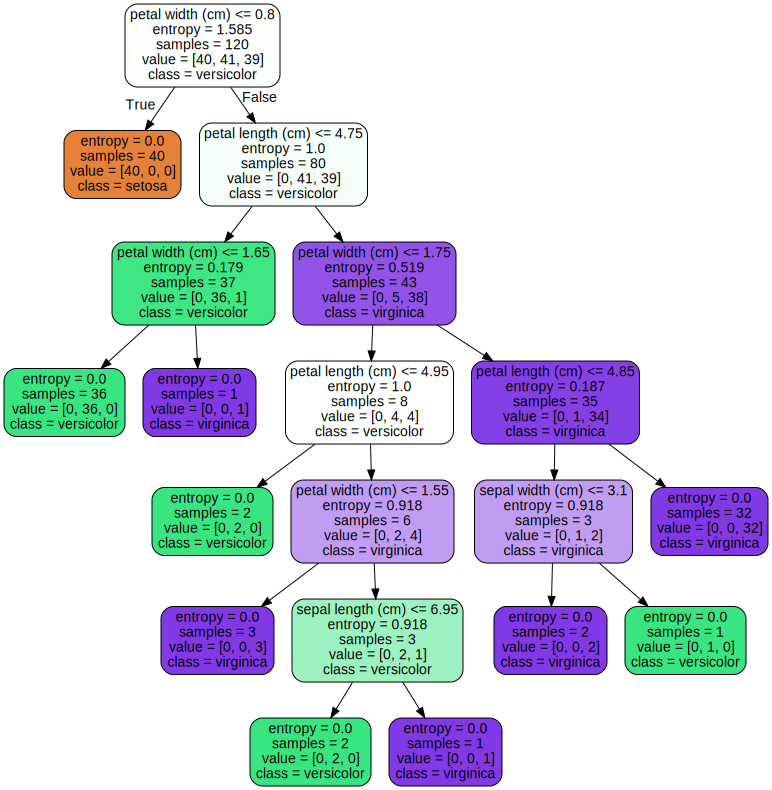

In [5]:
from sklearn.tree import export_graphviz
import graphviz

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# export the format of decision_tree
dot_data = export_graphviz(decision_tree_clf, 
                           feature_names=feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True) 
                            # filled: whether to fill color, rounded: round the edge
# Plot
graph = graphviz.Source(dot_data)

graph

## 1. The Classification of Iris Dataset Using Other Classifiers 

In [6]:
# Set the random seed to make the practice reproducible
import numpy as np

# Training model
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.naive_bayes import GaussianNB # Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.svm import SVC # Supper vector machine

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score # 拆分 train set 及 test set


np.random.seed(42)


iris = datasets.load_iris()

X = iris.data  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

models = {
    'LogisticRegressor': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    """
    Use train set to fit model and score the test set
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    models are packaged in dictionary
    """
    np.random.seed(42)
    
    model_score = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # sabe the score
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)
model_scores

{'LogisticRegressor': 1.0,
 'GaussianNB': 1.0,
 'KNeighborsClassifier': 1.0,
 'RandomForestClassifier': 1.0,
 'SVC': 1.0}

### End